# Iris Project - Supplementary Notebook
24-25: 4122 -- PROGRAMMING AND SCRIPTING : Project

## References

- Github Copilot. (n.d.). *GitHub Copilot*.  This is a code completion tool that uses machine learning to suggest code snippets and functions based on the context

## Note:

I do use github copilot to help me with code completion.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import python module analysis.py 

This follows the DRY principle (Don't Repeat Yourself) and allows the easy testing of the code in the analysis.py module. This also means that code is not repeated in the notebook

In [2]:
import analysis as an

Run initialisation of code in module , there is no main thus init needs to be run manually

In [3]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")

Data loaded successfully


## Run generate report 

This will display the report in the notebook and also save it to a file.


In [4]:
return_code = an.generate_report(an.config, to_console=True)
if return_code != 0:
    print(f"Error generating report : {return_code}")
else:
    print("Report generated successfully")

Analysis Report
DataFrame
DataFrame Shape: (150, 5)
DataFrame Info: <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x

## Plot histogram of the data
This will display the histogram in the notebook and also save it to a file.

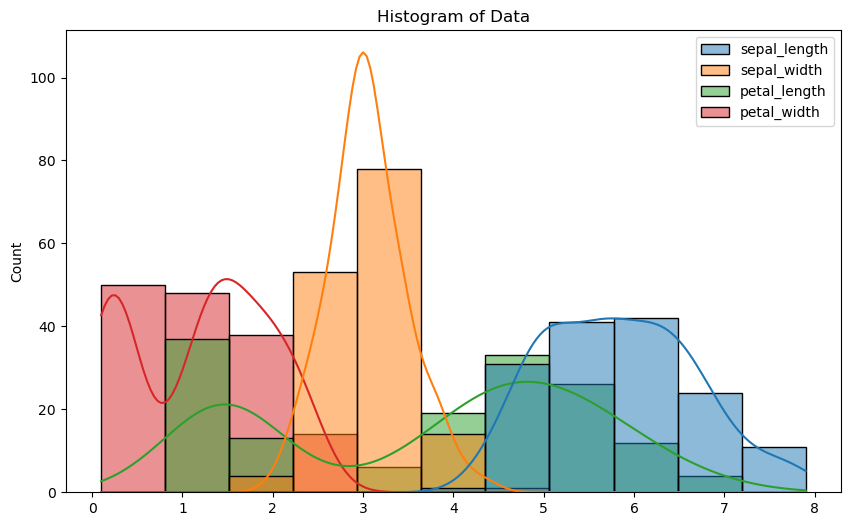

0

In [5]:
an.generate_histogram(an.config, to_console=True)

## Plot Scatterplot of the data
This will display the scatterplot in the notebook and also save it to a file.
of the code. 

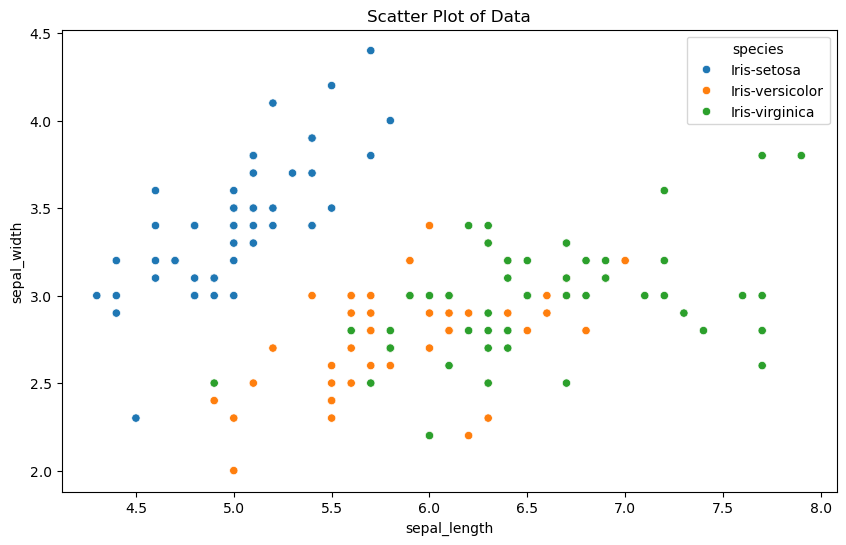

0

In [6]:
an.generate_scatter_plot(an.config, to_console=True)